# Examples of Neural Network
## 1. Adding layer to the network

In this example, the result shows the incrementaly convergent to the targeted value. 

In [12]:
import tensorflow as tf
import numpy as np

#Define the function for adding layer
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size])+0.1) #biases cannot be less than zero
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    
    return outputs

#Import the data 
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#Build up the layers
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #The parameter of the GradientDescent is learning rate

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
                         
for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i%50 == 0:
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))

0.25195697
0.008122951
0.0060506123
0.0054868124
0.00505801
0.0047631995
0.00452302
0.004294234
0.004133234
0.0040151887
0.0039071953
0.003813951
0.0037403575
0.0036542774
0.0035692842
0.0034966115
0.0034317796
0.0033905732
0.0033628114
0.0033426876


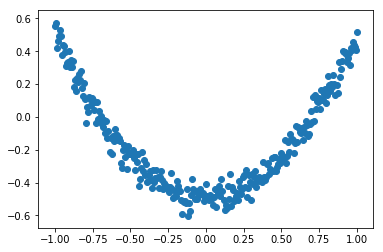

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Define the function for adding layer
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size])+0.1) #biases cannot be less than zero
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    
    return outputs

#Import the data 
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#Build up the layers
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #The parameter of the GradientDescent is learning rate

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
 
#Plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i%50 == 0:
        #To visualize the result and importment 
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        #Plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)